## Q1 a


In [1]:
import numpy as np
import pandas as pd
import os
import re
from tqdm import tqdm

In [2]:
## read the data file (附表1)
fb1_data = pd.read_excel(os.path.dirname(os.path.dirname(__vsc_ipynb_file__)) + r'\竞赛发布数据\附表1-检索表格-流水号vs时间(1).xlsx', dtype = str)
fb1_data_columns_list = ['Unnamed' not in x for x in fb1_data.columns]
tmp = [fb1_data.columns[0]]
fb1_data_columns_list = fb1_data.columns[fb1_data_columns_list]
tmp.extend(fb1_data_columns_list)
fb1_data_columns_list = tmp
fb1_data_columns_list
fb1_data = fb1_data[fb1_data_columns_list]
fb1_data.rename(columns={'Unnamed: 0': 'sub_code'}, inplace = True)
fb1_data.head()

,sub_code,重复次数,入院首次检查时间点,入院首次检查流水号,随访1时间点,随访1流水号,随访2时间点,随访2流水号,随访3时间点,随访3流水号,...,随访9时间点,随访9流水号,随访10时间点,随访10流水号,随访11时间点,随访11流水号,随访12时间点,随访12流水号,随访13时间点,随访13流水号
0,sub001,5,2016-12-12 23:32:54,20161212002136,2016-12-13 05:19:00,20161213000009,2016-12-18 09:09:24,20161218000100,2016-12-23 16:47:09,20161223001020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub002,5,2016-04-06 21:21:03,20160406002131,2016-04-07 09:16:27,20160407000424,2016-04-09 15:34:22,20160409000953,2016-04-25 10:22:02,20160425000901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub003,3,2016-04-13 01:18:17,20160413000006,2016-04-13 08:49:38,20160413000428,2016-04-14 14:54:02,20160414001379,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub004,4,2016-12-15 22:53:41,20161215001667,2016-12-16 14:52:08,20161216001119,2016-12-19 09:44:24,20161219000591,2016-12-25 09:23:45,20161225000084,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub005,3,2016-12-22 13:18:48,20161222000978,2016-12-23 10:46:51,20161223000561,2016-12-26 10:15:23,20161226000628,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
follow_up_columns = fb1_data.columns
follow_up_columns = ['随访' in x for x in follow_up_columns]
property_columns = [not x for x in follow_up_columns]
follow_up_columns = fb1_data.columns[follow_up_columns].to_list()
property_columns = fb1_data.columns[property_columns].to_list()
type(property_columns), follow_up_columns

new_fb1_data = pd.DataFrame()
for i_row in tqdm(range(len(fb1_data))):
    for i_col in range(0, len(follow_up_columns), 2):
        tmp_columns = follow_up_columns[i_col: i_col + 2]
        tmp_df = fb1_data.loc[i_row, property_columns + tmp_columns]
        tmp_df.index = property_columns + ['时间点', '流水号']
        tmp_df = tmp_df
        tmp_df = pd.DataFrame(tmp_df).T
        tmp_df['follow_up_count'] = re.sub('\D', '', follow_up_columns[i_col])
        # print(tmp_df)
        if new_fb1_data.empty:
            new_fb1_data = tmp_df
        else:
            new_fb1_data = pd.concat([new_fb1_data, tmp_df], axis = 0)
new_fb1_data = new_fb1_data.dropna()
new_fb1_data

100%|██████████| 160/160 [00:05<00:00, 31.54it/s]


,sub_code,重复次数,入院首次检查时间点,入院首次检查流水号,时间点,流水号,follow_up_count
0,sub001,5,2016-12-12 23:32:54,20161212002136,2016-12-13 05:19:00,20161213000009,1
0,sub001,5,2016-12-12 23:32:54,20161212002136,2016-12-18 09:09:24,20161218000100,2
0,sub001,5,2016-12-12 23:32:54,20161212002136,2016-12-23 16:47:09,20161223001020,3
0,sub001,5,2016-12-12 23:32:54,20161212002136,2016-12-30 14:35:12,20161230000574,4
1,sub002,5,2016-04-06 21:21:03,20160406002131,2016-04-07 09:16:27,20160407000424,1
...,...,...,...,...,...,...,...
157,sub158,4,2020-04-10 17:40:00,20200410001952,2020-04-11 09:15:00,20200411000244,1
157,sub158,4,2020-04-10 17:40:00,20200410001952,2020-04-13 14:10:00,20200413001806,2
157,sub158,4,2020-04-10 17:40:00,20200410001952,2020-04-23 11:31:00,20200423000871,3
158,sub159,2,2020-02-18 15:29:00,20200218000582,2020-02-19 15:01:00,20200219000588,1


In [4]:
follow_up_freq = [int(x) for x in fb1_data['重复次数'].to_list()]
for x in follow_up_freq:
    if x == 1:
        print("Warning")
## 说明随访次数均大于等于2

In [5]:
new_fb1_data.to_csv(os.path.dirname(os.path.dirname(__vsc_ipynb_file__)) + r'\竞赛发布数据\附表1-long.csv', encoding='utf_8_sig')

## 随访分析与可视化

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
sns.set_style('whitegrid')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

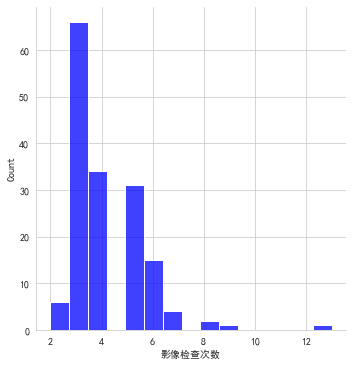

In [7]:
sns.displot([int(x) for x in fb1_data['重复次数']], kde = False, color = 'blue')
plt.xlabel('影像检查次数')
plt.show()

In [8]:
new_fb1_data['入院首次检查时间点'] = [datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S" ) for x in new_fb1_data['入院首次检查时间点']]
new_fb1_data['时间点'] = [datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S" ) for x in new_fb1_data['时间点']]

In [9]:
new_fb1_data['follow_up_gap'] = new_fb1_data['时间点'] - new_fb1_data['入院首次检查时间点']
new_fb1_data['follow_up_gap'] = [x.days for x in new_fb1_data['follow_up_gap']]
new_fb1_data

,sub_code,重复次数,入院首次检查时间点,入院首次检查流水号,时间点,流水号,follow_up_count,follow_up_gap
0,sub001,5,2016-12-12 23:32:54,20161212002136,2016-12-13 05:19:00,20161213000009,1,0
0,sub001,5,2016-12-12 23:32:54,20161212002136,2016-12-18 09:09:24,20161218000100,2,5
0,sub001,5,2016-12-12 23:32:54,20161212002136,2016-12-23 16:47:09,20161223001020,3,10
0,sub001,5,2016-12-12 23:32:54,20161212002136,2016-12-30 14:35:12,20161230000574,4,17
1,sub002,5,2016-04-06 21:21:03,20160406002131,2016-04-07 09:16:27,20160407000424,1,0
...,...,...,...,...,...,...,...,...
157,sub158,4,2020-04-10 17:40:00,20200410001952,2020-04-11 09:15:00,20200411000244,1,0
157,sub158,4,2020-04-10 17:40:00,20200410001952,2020-04-13 14:10:00,20200413001806,2,2
157,sub158,4,2020-04-10 17:40:00,20200410001952,2020-04-23 11:31:00,20200423000871,3,12
158,sub159,2,2020-02-18 15:29:00,20200218000582,2020-02-19 15:01:00,20200219000588,1,0


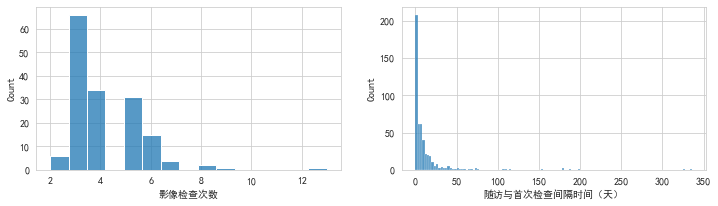

In [10]:
plt.figure(figsize = (12, 3))
plt.subplot(121)
sns.histplot([int(x) for x in fb1_data['重复次数']])
plt.xlabel('影像检查次数')
plt.subplot(122)
sns.histplot(new_fb1_data['follow_up_gap'])
plt.xlabel('随访与首次检查间隔时间（天）')
plt.savefig(os.path.dirname(os.path.dirname(__vsc_ipynb_file__)) + ".\\plots\\检查次数与检查时间间隔.png", bbox_inches = 'tight', dpi = 600)
plt.show()

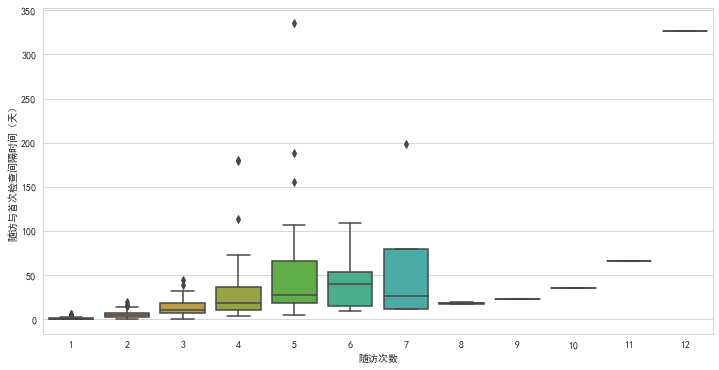

In [11]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = new_fb1_data['follow_up_count'], y = new_fb1_data['follow_up_gap'])
plt.xlabel('随访次数')
plt.ylabel('随访与首次检查间隔时间（天）')
plt.savefig(os.path.dirname(os.path.dirname(__vsc_ipynb_file__)) + ".\\plots\\检查时间间隔与随访次数.png", bbox_inches = 'tight', dpi = 600)
plt.show()

In [12]:
fb1_data['入院首次检查时间点'] = [datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S" ) for x in fb1_data['入院首次检查时间点']]
fb1_data['season'] = pd.cut(fb1_data['入院首次检查时间点'].dt.month, [0,3,6,9,12], labels=['Winter','Spring','Summer','Fall'])

In [13]:
fb1_data

,sub_code,重复次数,入院首次检查时间点,入院首次检查流水号,随访1时间点,随访1流水号,随访2时间点,随访2流水号,随访3时间点,随访3流水号,...,随访9流水号,随访10时间点,随访10流水号,随访11时间点,随访11流水号,随访12时间点,随访12流水号,随访13时间点,随访13流水号,season
0,sub001,5,2016-12-12 23:32:54,20161212002136,2016-12-13 05:19:00,20161213000009,2016-12-18 09:09:24,20161218000100,2016-12-23 16:47:09,20161223001020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall
1,sub002,5,2016-04-06 21:21:03,20160406002131,2016-04-07 09:16:27,20160407000424,2016-04-09 15:34:22,20160409000953,2016-04-25 10:22:02,20160425000901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring
2,sub003,3,2016-04-13 01:18:17,20160413000006,2016-04-13 08:49:38,20160413000428,2016-04-14 14:54:02,20160414001379,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring
3,sub004,4,2016-12-15 22:53:41,20161215001667,2016-12-16 14:52:08,20161216001119,2016-12-19 09:44:24,20161219000591,2016-12-25 09:23:45,20161225000084,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall
4,sub005,3,2016-12-22 13:18:48,20161222000978,2016-12-23 10:46:51,20161223000561,2016-12-26 10:15:23,20161226000628,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sub156,4,2020-03-06 14:33:56,20200306000927,2020-03-07 09:56:51,20200307000267,2020-03-11 14:40:53,20200311001116,2020-03-18 14:22:58,20200318001188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter
156,sub157,4,2020-10-09 19:35:00,20201009003102,2020-10-09 20:27:00,20201009003124,2020-10-10 02:12:00,20201010000011,2020-10-10 15:09:00,20201010002296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall
157,sub158,4,2020-04-10 17:40:00,20200410001952,2020-04-11 09:15:00,20200411000244,2020-04-13 14:10:00,20200413001806,2020-04-23 11:31:00,20200423000871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring
158,sub159,2,2020-02-18 15:29:00,20200218000582,2020-02-19 15:01:00,20200219000588,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter


In [14]:
fb1_data['day_or_night'] = pd.cut(fb1_data['入院首次检查时间点'].dt.hour, [0, 7, 19, 24],labels=['Night', 'Day', 'Night'], ordered=False)
fb1_data

,sub_code,重复次数,入院首次检查时间点,入院首次检查流水号,随访1时间点,随访1流水号,随访2时间点,随访2流水号,随访3时间点,随访3流水号,...,随访10时间点,随访10流水号,随访11时间点,随访11流水号,随访12时间点,随访12流水号,随访13时间点,随访13流水号,season,day_or_night
0,sub001,5,2016-12-12 23:32:54,20161212002136,2016-12-13 05:19:00,20161213000009,2016-12-18 09:09:24,20161218000100,2016-12-23 16:47:09,20161223001020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,Night
1,sub002,5,2016-04-06 21:21:03,20160406002131,2016-04-07 09:16:27,20160407000424,2016-04-09 15:34:22,20160409000953,2016-04-25 10:22:02,20160425000901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,Night
2,sub003,3,2016-04-13 01:18:17,20160413000006,2016-04-13 08:49:38,20160413000428,2016-04-14 14:54:02,20160414001379,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,Night
3,sub004,4,2016-12-15 22:53:41,20161215001667,2016-12-16 14:52:08,20161216001119,2016-12-19 09:44:24,20161219000591,2016-12-25 09:23:45,20161225000084,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,Night
4,sub005,3,2016-12-22 13:18:48,20161222000978,2016-12-23 10:46:51,20161223000561,2016-12-26 10:15:23,20161226000628,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sub156,4,2020-03-06 14:33:56,20200306000927,2020-03-07 09:56:51,20200307000267,2020-03-11 14:40:53,20200311001116,2020-03-18 14:22:58,20200318001188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,Day
156,sub157,4,2020-10-09 19:35:00,20201009003102,2020-10-09 20:27:00,20201009003124,2020-10-10 02:12:00,20201010000011,2020-10-10 15:09:00,20201010002296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,Day
157,sub158,4,2020-04-10 17:40:00,20200410001952,2020-04-11 09:15:00,20200411000244,2020-04-13 14:10:00,20200413001806,2020-04-23 11:31:00,20200423000871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,Day
158,sub159,2,2020-02-18 15:29:00,20200218000582,2020-02-19 15:01:00,20200219000588,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,Day


In [15]:
grouped_fb1_season = fb1_data.groupby('season').count()
grouped_fb1_season

,sub_code,重复次数,入院首次检查时间点,入院首次检查流水号,随访1时间点,随访1流水号,随访2时间点,随访2流水号,随访3时间点,随访3流水号,...,随访9流水号,随访10时间点,随访10流水号,随访11时间点,随访11流水号,随访12时间点,随访12流水号,随访13时间点,随访13流水号,day_or_night
season,,,,,,,,,,,,,,,,,,,,,
Winter,37,37,37,37,37,37,34,34,23,23,...,1,1,1,1,1,1,1,0,0,36
Spring,37,37,37,37,37,37,36,36,27,27,...,0,0,0,0,0,0,0,0,0,37
Summer,29,29,29,29,29,29,28,28,10,10,...,0,0,0,0,0,0,0,0,0,29
Fall,57,57,57,57,57,57,56,56,28,28,...,0,0,0,0,0,0,0,0,0,55


In [16]:
grouped_fb1_season['season'] = grouped_fb1_season.index
grouped_fb1_season

,sub_code,重复次数,入院首次检查时间点,入院首次检查流水号,随访1时间点,随访1流水号,随访2时间点,随访2流水号,随访3时间点,随访3流水号,...,随访10时间点,随访10流水号,随访11时间点,随访11流水号,随访12时间点,随访12流水号,随访13时间点,随访13流水号,day_or_night,season
season,,,,,,,,,,,,,,,,,,,,,
Winter,37,37,37,37,37,37,34,34,23,23,...,1,1,1,1,1,1,0,0,36,Winter
Spring,37,37,37,37,37,37,36,36,27,27,...,0,0,0,0,0,0,0,0,37,Spring
Summer,29,29,29,29,29,29,28,28,10,10,...,0,0,0,0,0,0,0,0,29,Summer
Fall,57,57,57,57,57,57,56,56,28,28,...,0,0,0,0,0,0,0,0,55,Fall


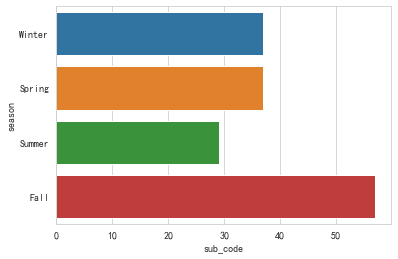

In [17]:
sns.barplot(x = 'sub_code', y = 'season', data = grouped_fb1_season)

In [18]:
grouped_fb1_day_or_night = fb1_data.groupby('day_or_night').count()
grouped_fb1_day_or_night['day_or_night'] = grouped_fb1_day_or_night.index
grouped_fb1_day_or_night

,sub_code,重复次数,入院首次检查时间点,入院首次检查流水号,随访1时间点,随访1流水号,随访2时间点,随访2流水号,随访3时间点,随访3流水号,...,随访10时间点,随访10流水号,随访11时间点,随访11流水号,随访12时间点,随访12流水号,随访13时间点,随访13流水号,season,day_or_night
day_or_night,,,,,,,,,,,,,,,,,,,,,
Day,104,104,104,104,104,104,100,100,60,60,...,1,1,1,1,1,1,0,0,104,Day
Night,53,53,53,53,53,53,51,51,27,27,...,0,0,0,0,0,0,0,0,53,Night


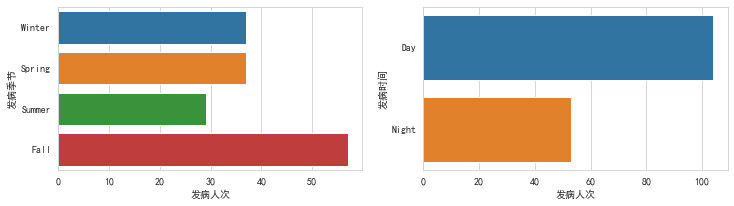

In [19]:
plt.figure(figsize = (12, 3))
plt.subplot(121)
sns.barplot(x = 'sub_code', y = 'season', data = grouped_fb1_season)
plt.xlabel('发病人次')
plt.ylabel('发病季节')
plt.subplot(122)
sns.barplot(x = 'sub_code', y = 'day_or_night', data = grouped_fb1_day_or_night)
plt.xlabel('发病人次')
plt.ylabel('发病时间')
plt.savefig(os.path.dirname(os.path.dirname(__vsc_ipynb_file__)) + ".\\plots\\发病季节与发病时间.png", bbox_inches = 'tight', dpi = 600)
plt.show()